<a href="https://colab.research.google.com/github/hecshzye/brain_computer_interface_analysis_1/blob/main/BCI_EEG_Data_Analysis_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import requests

# To load and read Matlab data 
from scipy.io import loadmat 

In [3]:
# Load the data from the directory 

mat_data = loadmat("BCICIV_calib_ds1d.mat", struct_as_record=True)

In [5]:
# Analysing the keys of mat_data
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'cnt', 'nfo'])

In [6]:
# Signal frequency of the EEG data 
sfreq = mat_data["nfo"]["fs"][0][0][0][0]

# Data manipulations 
EEGdata = mat_data["cnt"].T   #transpose 

# Number of EEG--Channels
nchannels, nsamples = EEGdata.shape 

# Channel Names
chan_names = [s[0] for s in mat_data["nfo"]["clab"][0][0][0]]

In [7]:
# Events --
event_onsets = mat_data["mrk"][0][0][0]
event_codes = mat_data["mrk"][0][0][1]

# labels 
labels = np.zeros((1, nsamples), int)
labels[0, event_onsets] = event_codes

cl_lab = [s[0] for s in mat_data["nfo"]["classes"][0][0][0]]
cl1 = cl_lab[0]
cl2 = cl_lab[1]

In [9]:
# EEG Electrode positions digitised 
xpos = mat_data["nfo"]["xpos"]
ypos = mat_data["nfo"]["ypos"]

nclasses = len(cl_lab)
nevents = len(event_onsets)

In [10]:
# Visualize 
print("Sample Rate:", sfreq)
print("Channel Names:", nchannels)
print("Shape of EEG data:", EEGdata.shape)
print("NUmber of channels:", nchannels)
print("Number of Events:", len(event_onsets))
print("Number of Classes:", nclasses)
print("Class Labels:", cl_lab)
print("Event Codes:", np.unique(event_codes))


Sample Rate: 100
Channel Names: 59
Shape of EEG data: (59, 190473)
NUmber of channels: 59
Number of Events: 1
Number of Classes: 2
Class Labels: ['left', 'right']
Event Codes: [-1  1]


In [14]:
# Store the trials in a Dict, for each class
trials = {}

# Total window of time to extract for each trial
win = np.arange(int(0.5*sfreq), int(2.5*sfreq))

# Length of each time window
nsamples = len(win)

# Createw a loop over classes -- right, foot
for cl, code in zip(cl_lab, np.unique(event_codes)):

  # for the onset of each class
  cl_onsets = event_onsets[event_codes == code]

  # for the memory of each trial
  trials[cl] = np.zeros((nchannels, nsamples, len(cl_onsets)))

  # for each trial
  for i, onset in enumerate(cl_onsets):
    trials[cl][:,:,i] = EEGdata[:, win+onset]


In [15]:
# Shape of each trial
print("Shape of trial[cl1]:", trials[cl1].shape)
print("shape of trials[cl2]:", trials[cl2].shape)

Shape of trial[cl1]: (59, 200, 100)
shape of trials[cl2]: (59, 200, 100)


In [16]:
%qtconsole

In [19]:
left_hand = np.rollaxis(trials[cl1], 2, 0)
right_hand =  np.rollaxis(trials[cl2], 2, 0)

# Shape of left and right hand
left_hand.shape, right_hand.shape 

((100, 59, 200), (100, 59, 200))

In [20]:
data = np.concatenate([left_hand, right_hand])

# Create labels
Y = np.concatenate([-np.ones(left_hand.shape[0]),
                    np.ones(right_hand.shape[0])])

### MNE Structures for EEG data visualization

In [22]:
!pip install mne 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 5.2 MB/s 


In [24]:
# Imports
import mne 

nchannels = 59

info = mne.create_info(
    ch_names = chan_names, 
    ch_types = ["eeg"]*nchannels,
    sfreq = sfreq
)

print("Event Created: ", info)

Event Created:  <Info | 7 non-empty values
 bads: []
 ch_names: AF3, AF4, F5, F3, F1, Fz, F2, F4, F6, FC5, FC3, FC1, FCz, FC2, ...
 chs: 59 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 59
 projs: []
 sfreq: 100.0 Hz
>


### **Initialized currently**

 **ch_names**: AF3, AF4, F5, F3, F1, Fz, F2, F4, F6, FC5, FC3, FC1, FCz, FC2, ...

 **chs**: 59 EEG

 **custom_ref_applied**: False

 **highpass**: 0.0 Hz

 **lowpass**: 50.0 Hz

 **meas_date**: unspecified

 **nchan**: 59

 **projs**: []

 **sfreq**: 100.0 Hz

In [27]:
# Electrode Positions (Digitals)
xpos = mat_data["nfo"]["xpos"][0][0]
ypos = mat_data["nfo"]["ypos"][0][0]

layout_pos = np.concatenate([xpos, ypos], axis = 1)
layout_pos

array([[-0.20109028,  0.68656518],
       [ 0.20109028,  0.68656518],
       [-0.48547489,  0.52547424],
       [-0.32894737,  0.46520183],
       [-0.16535231,  0.43208641],
       [ 0.        ,  0.421549  ],
       [ 0.16535231,  0.43208641],
       [ 0.32894737,  0.46520183],
       [ 0.48547489,  0.52547424],
       [-0.60591541,  0.27165704],
       [-0.39919579,  0.23384348],
       [-0.19765935,  0.21394494],
       [ 0.        ,  0.20773757],
       [ 0.19765935,  0.21394494],
       [ 0.39919579,  0.23384348],
       [ 0.60591541,  0.27165704],
       [-0.74834683,  0.15177169],
       [-0.52472976,  0.12553103],
       [-0.30963911,  0.11086096],
       [-0.10226303,  0.10426648],
       [ 0.10226303,  0.10426648],
       [ 0.30963911,  0.11086096],
       [ 0.52472976,  0.12553103],
       [ 0.74834683,  0.15177169],
       [-0.87719298,  0.        ],
       [-0.64569058,  0.        ],
       [-0.421549  ,  0.        ],
       [-0.20773757,  0.        ],
       [ 0.        ,

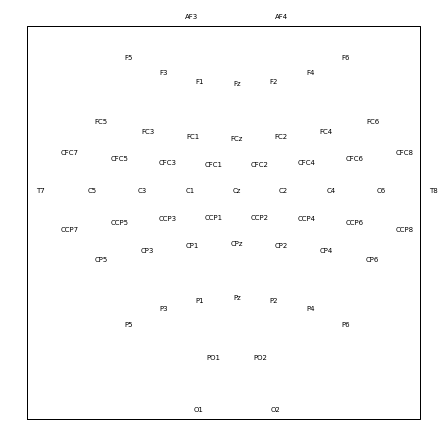

In [28]:
# Plot the layeout --mne channels 

layout = mne.channels.generate_2d_layout(
    xy = layout_pos, 
    ch_names = chan_names, 
    name = "EEG custom layout"
)

layout.plot();

In [29]:
# MNE EVENTS 
event_id = dict(left = -1, right = 1)

# Event matrix -- alternating events
eventLength = Y.shape[0]
ev = [i*sfreq*3 for i in range(eventLength)]
events = np.column_stack((np.array(ev,  dtype = int),
                          np.zeros(eventLength,  dtype = int),
                          np.array(Y,  dtype = int)))

events 

array([[    0,     0,    -1],
       [  300,     0,    -1],
       [  600,     0,    -1],
       [  900,     0,    -1],
       [ 1200,     0,    -1],
       [ 1500,     0,    -1],
       [ 1800,     0,    -1],
       [ 2100,     0,    -1],
       [ 2400,     0,    -1],
       [ 2700,     0,    -1],
       [ 3000,     0,    -1],
       [ 3300,     0,    -1],
       [ 3600,     0,    -1],
       [ 3900,     0,    -1],
       [ 4200,     0,    -1],
       [ 4500,     0,    -1],
       [ 4800,     0,    -1],
       [ 5100,     0,    -1],
       [ 5400,     0,    -1],
       [ 5700,     0,    -1],
       [ 6000,     0,    -1],
       [ 6300,     0,    -1],
       [ 6600,     0,    -1],
       [ 6900,     0,    -1],
       [ 7200,     0,    -1],
       [ 7500,     0,    -1],
       [ 7800,     0,    -1],
       [ 8100,     0,    -1],
       [ 8400,     0,    -1],
       [ 8700,     0,    -1],
       [ 9000,     0,    -1],
       [ 9300,     0,    -1],
       [ 9600,     0,    -1],
       [ 9

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated


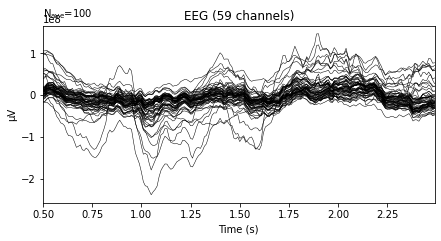

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


<ipython-input-31-8687bf3cce92>:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.plot_psd();


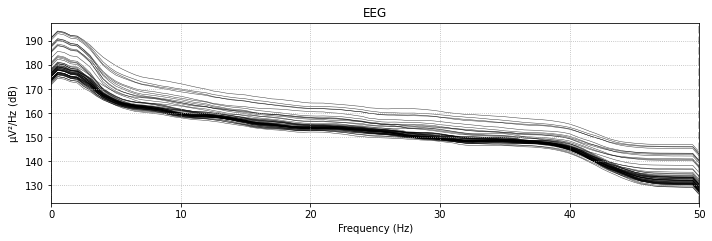

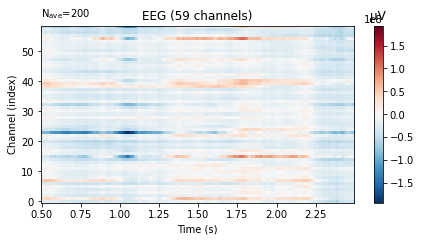

In [31]:
# Sampling time window-- 0.5s to 2.5s
tmin = 0.5                

# "mne.EpochsArray" object
epochs = mne.EpochsArray(data, info, events, tmin, event_id)

# Plot 1 
epochs['left'].average().plot();

# Plot 2
epochs.plot_psd();

# Plot 3
epochs.average().plot_image();

Setting up band-pass filter from 8 - 32 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 32.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 36.00 Hz)
- Filter length: 165 samples (1.650 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 11800 out of 11800 | elapsed:    6.3s finished


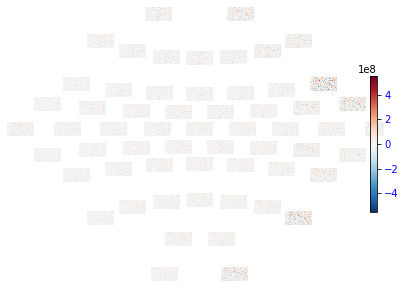

In [32]:
epochs.filter(l_freq=8, h_freq=32)
epochs.plot_topo_image(layout=layout, 
                       fig_facecolor='w', font_color='b');